# Series de tiempo.

En esta libreta veremos series de tiempo en pandas. Primero veremos un poco de visualización, manipulación, etc. de series de tiempo. Veremos un poco de teoría "clásica" para lidiar con series de tiempo (muchas veces la teoría clásica le gana a las redes neuronales, sobre todo en series simples). Después, poco a poco, veremos cómo usar redes neuronales para series de tiempo. Primero "normalitas", luego recurrentes y luego transformers.

In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime

import matplotlib.pyplot as plt

Vamos a usar un dataset de juguete para experimentar. Contiene las temperaturas mínimas de cada día de 1981 a 1990 en una ciudad de Australia. Lo puedes descargar [aquí](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv).

In [2]:
df = pd.read_csv("daily-min-temperatures.csv"); df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


Quiero que 'Date' sea el índice, y que de hecho sea una fecha

In [4]:
alumnos = ["Arnold", "Erika", "Leo Grande", "Leo Chico", "Hannia", "Diego", "Dani", "Tania", "Miguel"]
random.choice(alumnos)

'Dani'

In [5]:
df = pd.read_csv("daily-min-temperatures.csv", parse_dates = ["Date"], index_col = "Date")

In [6]:
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [8]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


## Visualización en pandas

Lo primero que tienes que hacer con un nuevo dataset es VERLO. Entenderlo, ver el formato, qué significan las columnas, etc. etc. etc.

En este caso es súper sencillito, así que con algunas visualizaciones podemos entenderlo: hist, line, area, box, kde

<Axes: xlabel='Date'>

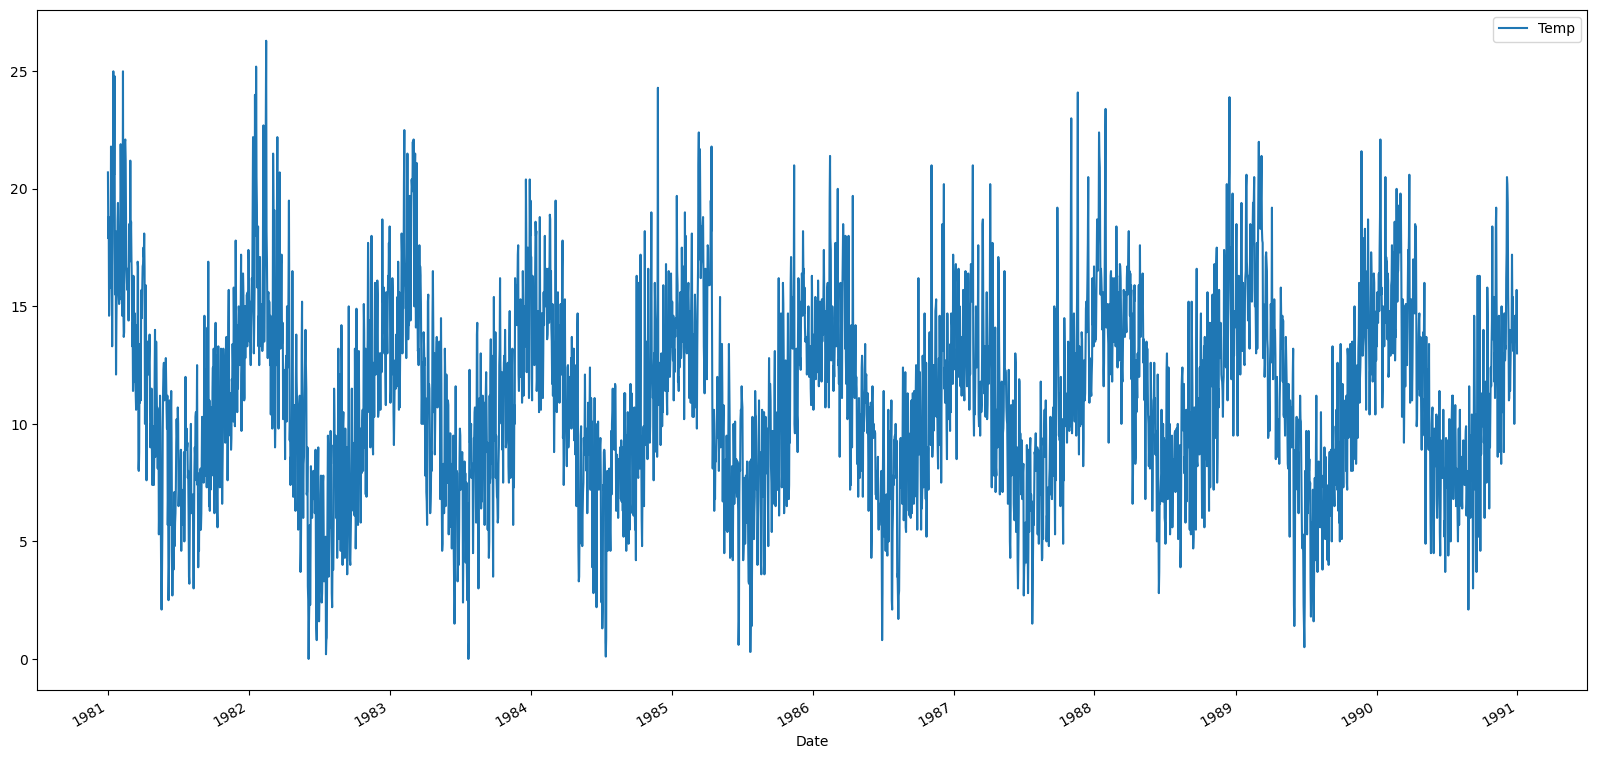

In [9]:
df.plot(figsize=(20,10))

array([[<Axes: title={'center': 'Temp'}>]], dtype=object)

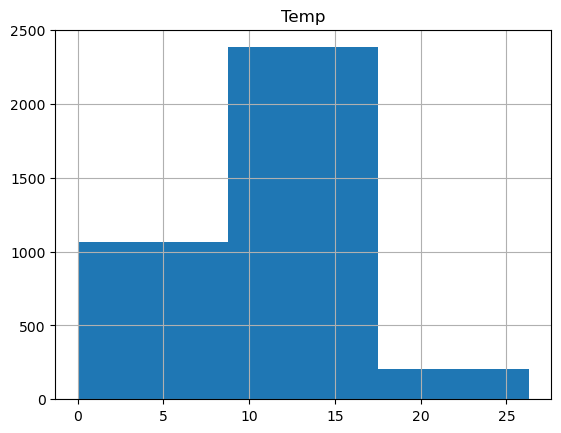

In [10]:
df.hist(bins=3)

<Axes: xlabel='Date'>

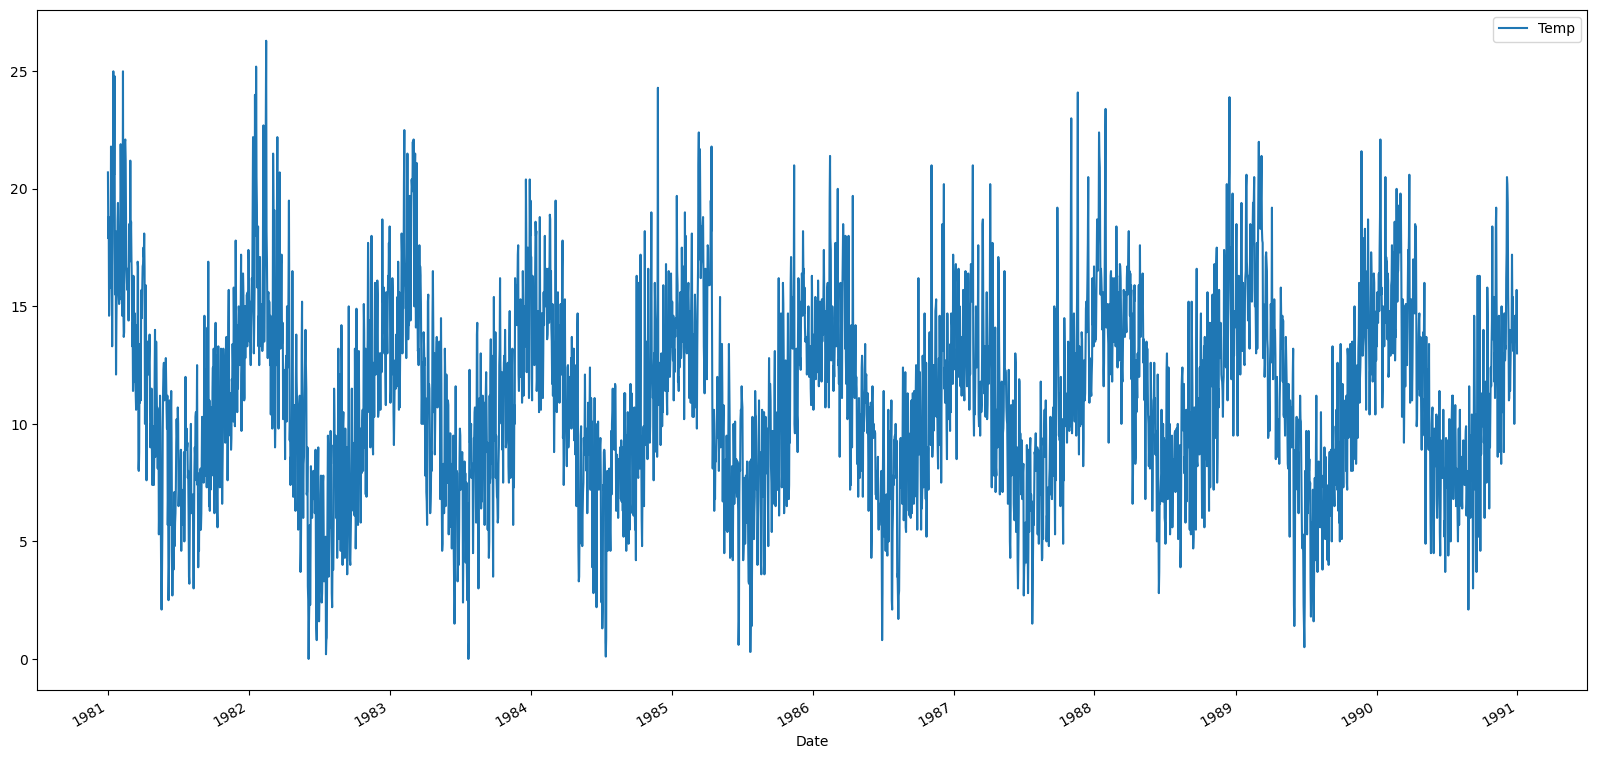

In [11]:
df.plot.line(figsize=(20,10))

<Axes: ylabel='Frequency'>

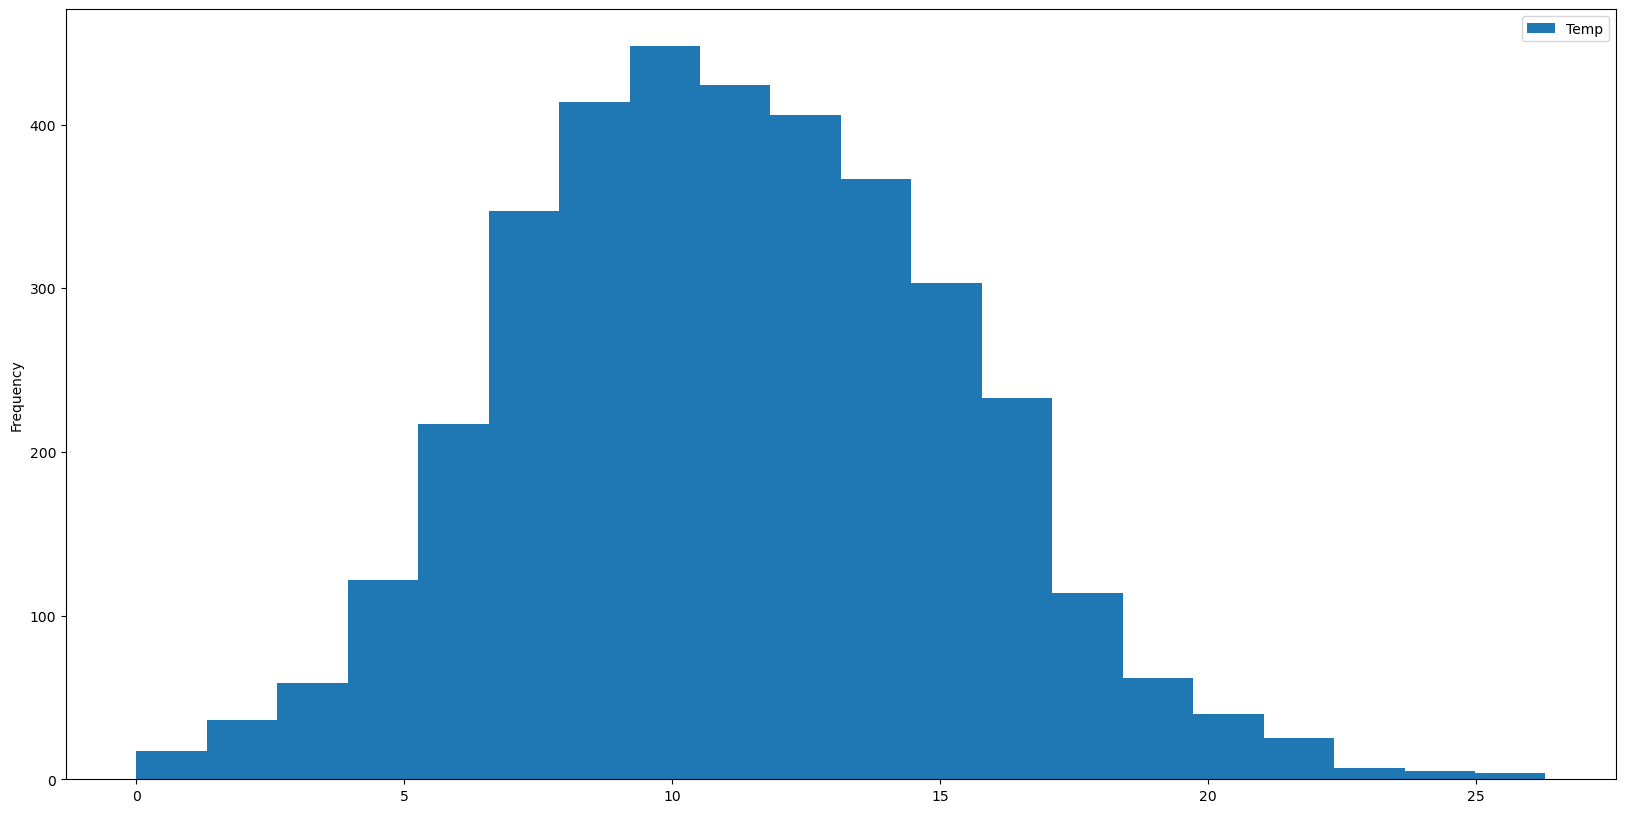

In [12]:
df.plot.hist(bins=20,figsize=(20,10))

In [13]:
#df.plot.area(alpha= 0.2, figsize=(20,10))

<Axes: >

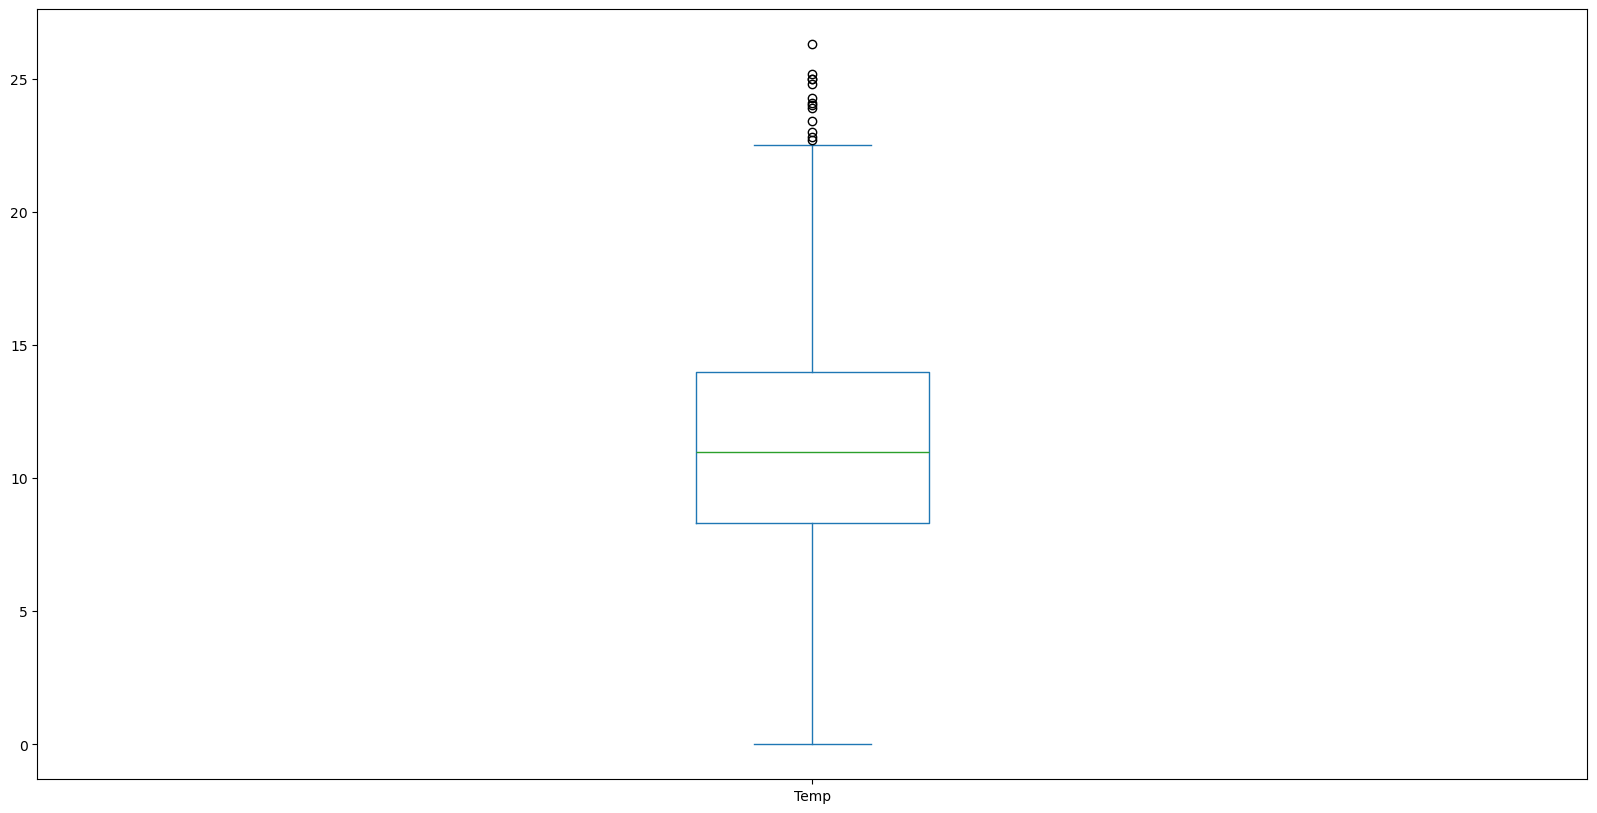

In [14]:
df.plot.box(figsize=(20,10))

<Axes: ylabel='Density'>

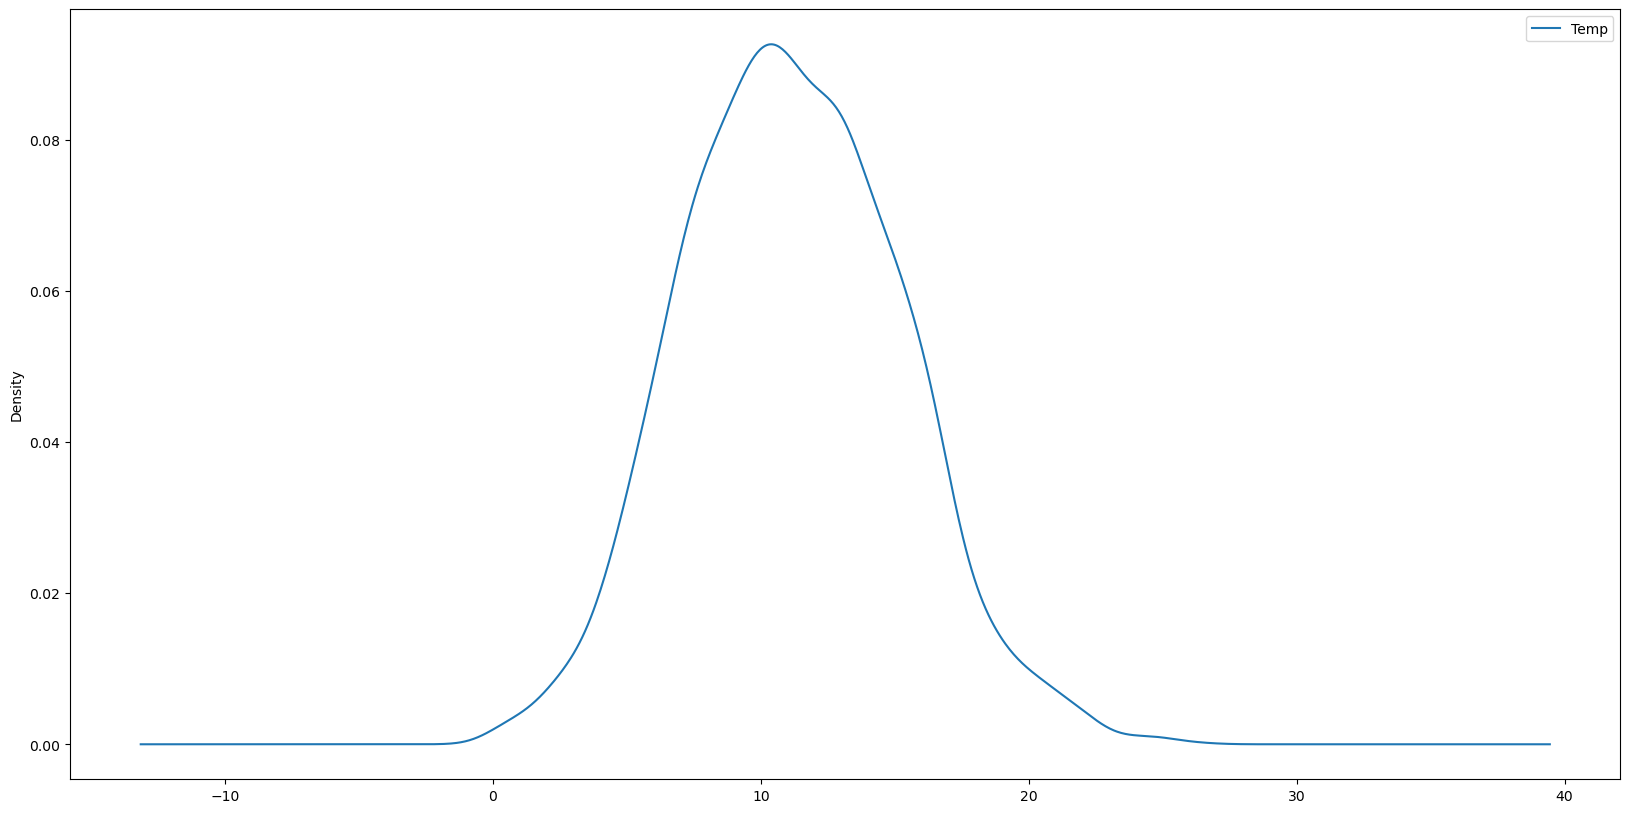

In [15]:
df.plot.kde(figsize=(20,10))

<Axes: ylabel='Frequency'>

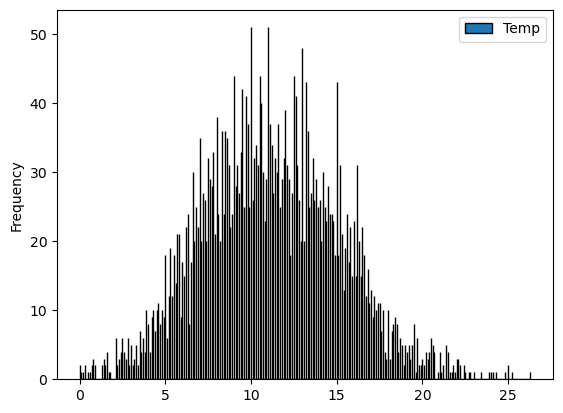

In [16]:
df.plot.hist(edgecolor='k',bins=20000)

<Axes: xlabel='Date'>

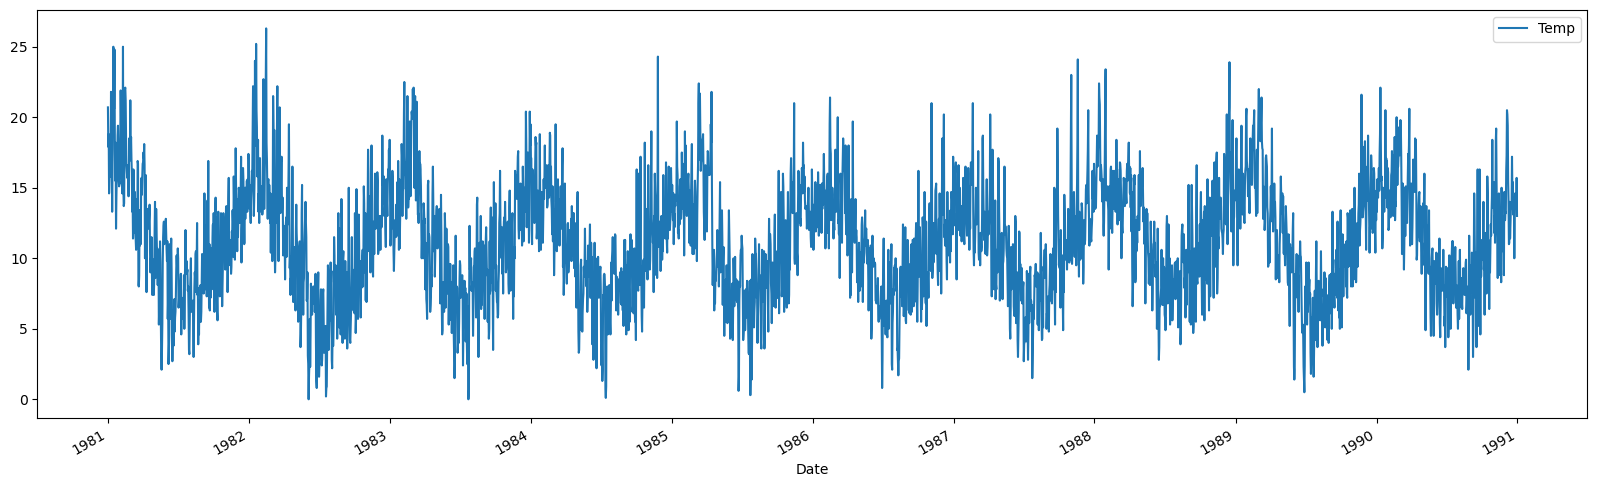

In [17]:
df.plot.line(y='Temp',figsize=(20,6))

<Axes: xlabel='Date'>

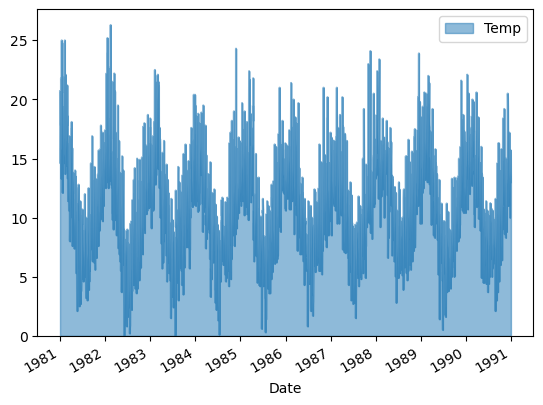

In [18]:
df.plot.area(alpha=0.5)

<Axes: >

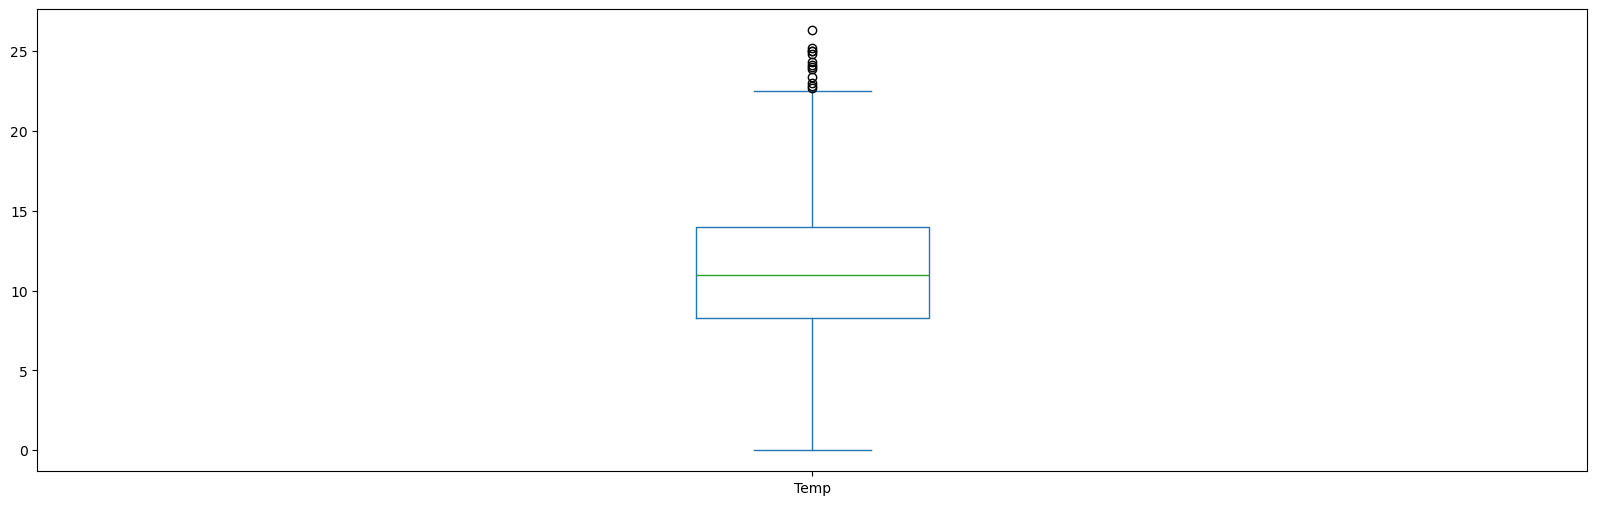

In [19]:
df.plot.box(figsize=(20,6))

<Axes: ylabel='Density'>

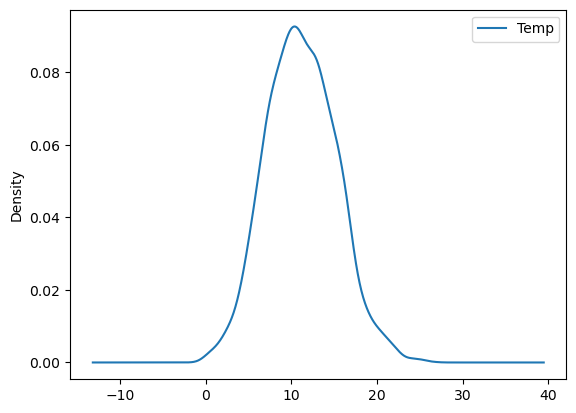

In [20]:
df.plot.kde()

## Agregando columnas.

Digamos que queremos añadir la columna "mes" 

In [21]:
random.choice(alumnos)

'Diego'

In [22]:
df['mes'] = df.index.month

In [23]:
df.groupby('mes').mean()

,Temp
mes,
1,15.030323
2,15.373759
3,14.565484
4,12.088333
5,9.866452
6,7.278333
7,6.692581
8,7.891290
9,8.976333


<Axes: xlabel='mes'>

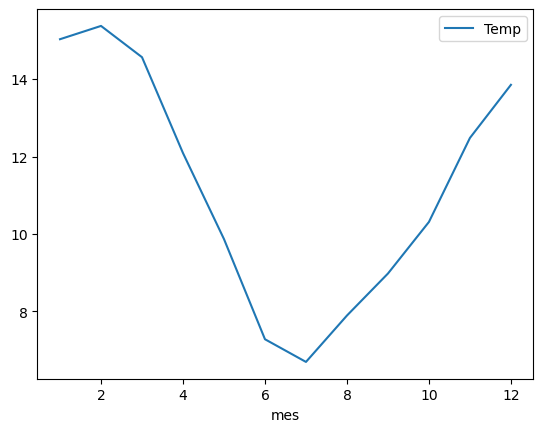

In [24]:
df.groupby('mes').mean().plot()

In [ ]:
df['Mes'] = df.index.month

In [ ]:
df.groupby('Mes').mean().plot()

In [25]:
df['Año'] = df.index.year

<Axes: xlabel='Año'>

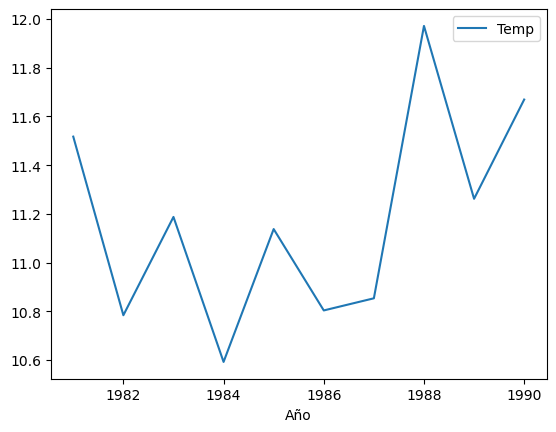

In [26]:
df[['Año', 'Temp']].groupby('Año').mean().plot()

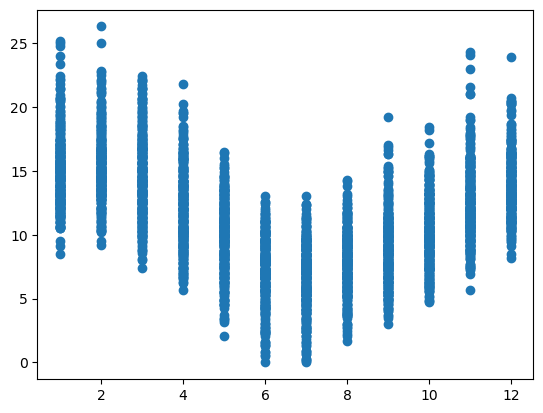

In [28]:
plt.scatter(x=df['mes'],y=df['Temp'])

### Tarea: Repite este proceso en el siguiente dataset:
Analiza 2015-2018-historical-schoo-attendance.csv.

En particular:
- Está separado por escuela. Si quieremos ver el trend "global", ¿cómo lo juntamos? (hint: groupby)
- Crea columnas de porcentajes. Si faltaron 10 de 20 es muy diferente que si faltaron 10 de 10000.
- Visualíza cada variable. 
- Visualiza las parejas de variables. Usa scatter para ver relaciones. hex plots.

## Primera regla de series de tiempo: Valida con **lo último**, no con aleatorios.

In [29]:
df

,Temp,mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981
...,...,...,...
1990-12-27,14.0,12,1990
1990-12-28,13.6,12,1990
1990-12-29,13.5,12,1990


In [30]:
df=df.sort_index()

In [31]:
df

,Temp,mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981
...,...,...,...
1990-12-27,14.0,12,1990
1990-12-28,13.6,12,1990
1990-12-29,13.5,12,1990


In [32]:
len(df)

3650

In [33]:
3650-365

3285

In [34]:
train_df = df[:-365]
valid_df = df[-365:]

In [35]:
train_df

,Temp,mes,Año
Date,,,
1981-01-01,20.7,1,1981
1981-01-02,17.9,1,1981
1981-01-03,18.8,1,1981
1981-01-04,14.6,1,1981
1981-01-05,15.8,1,1981
...,...,...,...
1989-12-27,13.3,12,1989
1989-12-28,11.7,12,1989
1989-12-29,10.4,12,1989


## Baselines

Lo primero que tenemos que hacer es establecer las baselines. Tenemos dos baselines "estándar" para series de tiempo: 
1. Promedio 
2. Repite última. 

A veces funciona mejor una y a veces otra. En el caso de la temperatura: ¿qué creen que funcione mejor? Para discutir: ¿en qué casos creen que funcione mejor una y en qué casos la otra?

Vamos a ver como calcularlas.

In [36]:
Mu=df[:-365]["Temp"].mean()

## Baseline del promedio

In [37]:
np.sqrt(((df[-365:]["Temp"].values-Mu)**2).mean())

3.8948359853859946

## Baseline de "predice la última"

In [38]:
df['temp_prev'] = df['Temp'].shift(1)

In [39]:
df

,Temp,mes,Año,temp_prev
Date,,,,
1981-01-01,20.7,1,1981,NaN
1981-01-02,17.9,1,1981,20.7
1981-01-03,18.8,1,1981,17.9
1981-01-04,14.6,1,1981,18.8
1981-01-05,15.8,1,1981,14.6
...,...,...,...,...
1990-12-27,14.0,12,1990,14.6
1990-12-28,13.6,12,1990,14.0
1990-12-29,13.5,12,1990,13.6


In [40]:
np.sqrt(((df[-365:]["Temp"].values-df[-365:]["temp_prev"].values)**2).mean())

2.5824009217292243

<Axes: xlabel='Temp', ylabel='temp_prev'>

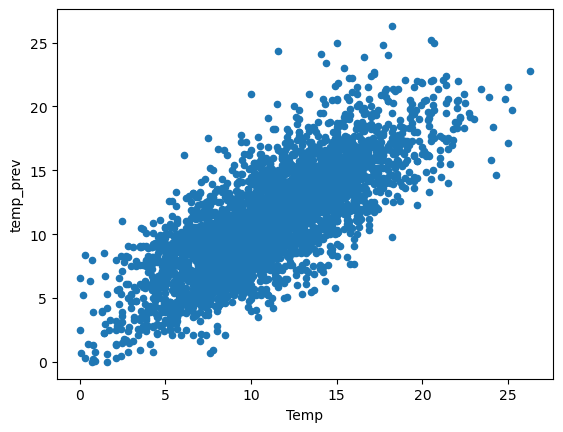

In [41]:
df.plot.scatter('Temp', 'temp_prev')

<Axes: xlabel='Date'>

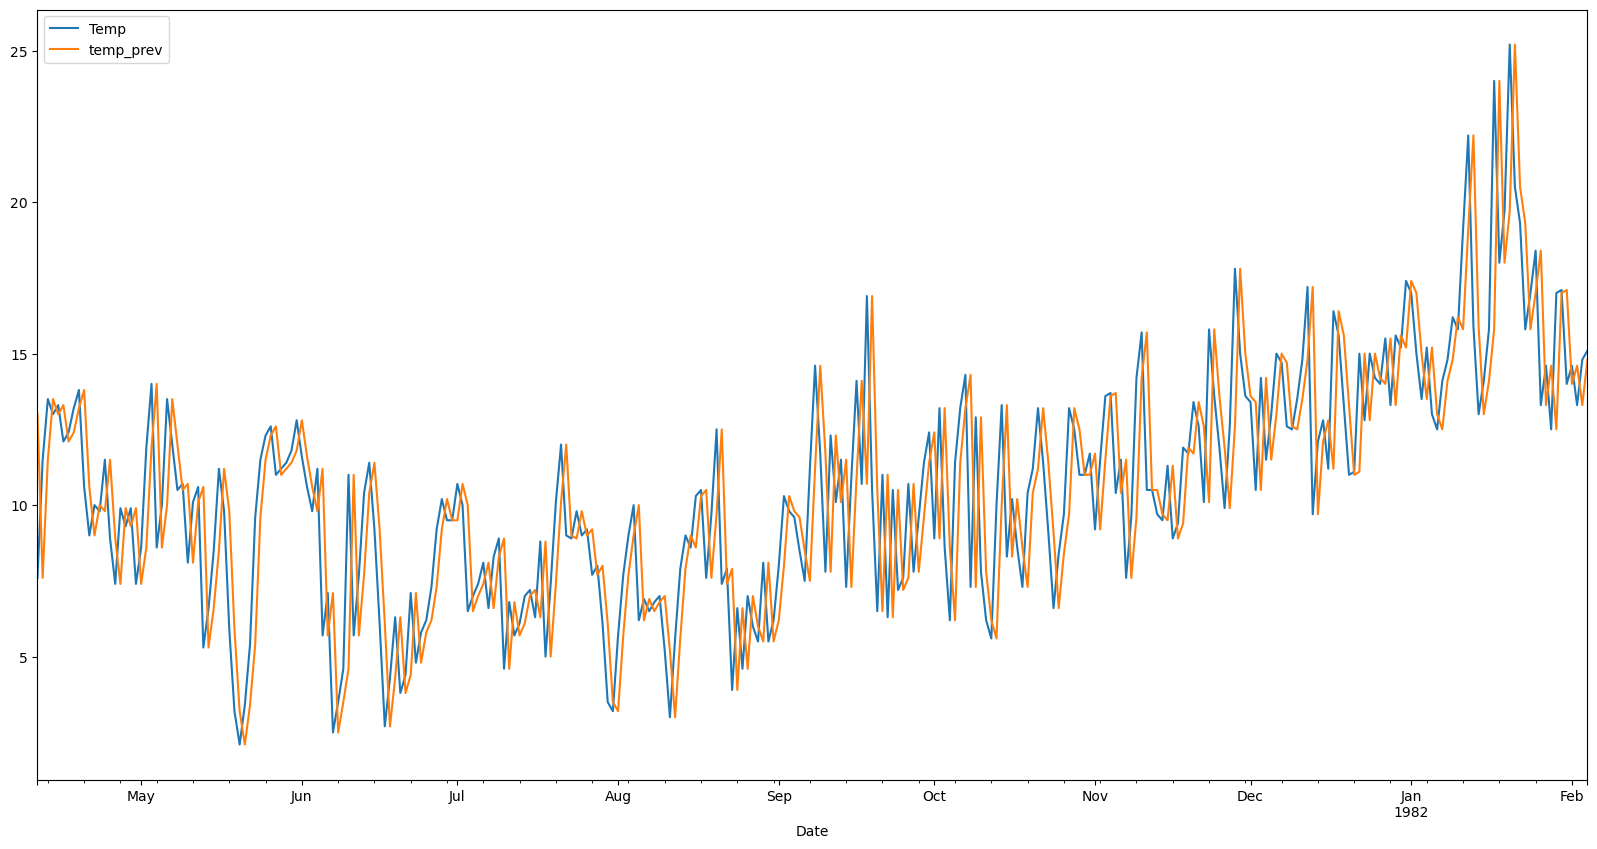

In [42]:
df[['Temp', 'temp_prev']][100:400].plot(figsize=(20,10))

### Última
Usa "shift" para comparar con la última, plotea. (scatter y line)

Ahora crea funciones error_l1 y error_rmse para entender

In [43]:
random.choice(alumnos)

'Arnold'

In [44]:
def error_l1(df, col1, col2, valid=-365):
    a = df[col1][valid:].values
    b = df[col2][valid:].values
    return np.mean(np.abs(a-b))

In [45]:
error_l1(df, "Temp", "temp_prev")

2.024931506849315

In [46]:
def error_rmse(df, col1, col2, valid=-365):
    a = df[col1][valid:].values
    b = df[col2][valid:].values
    return np.sqrt(np.mean(np.square(a-b)))

In [47]:
error_rmse(df, "Temp", "temp_prev")

2.5824009217292243

### Promedio

En cada medición quiero encontrar el promedio de todo lo anterior. Para esto vamos a usar el método *expanding* en pandas:

In [48]:
df['Temp'].expanding()

Expanding [min_periods=1,axis=0,method=single]

In [49]:
df['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [50]:
df['Temp'].expanding().mean()

Date
1981-01-01    20.700000
1981-01-02    19.300000
1981-01-03    19.133333
1981-01-04    18.000000
1981-01-05    17.560000
                ...    
1990-12-27    11.174712
1990-12-28    11.175377
1990-12-29    11.176014
1990-12-30    11.177254
1990-12-31    11.177753
Name: Temp, Length: 3650, dtype: float64

In [51]:
df['PromedioAnteriores'] = df['Temp'].expanding().mean().shift(1)

<Axes: xlabel='Date'>

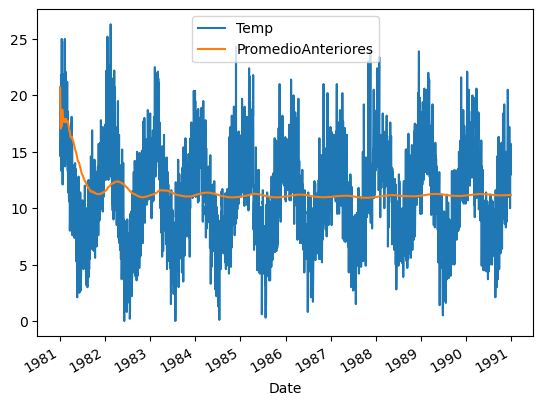

In [52]:
df[['Temp','PromedioAnteriores']].plot()

In [53]:
error_l1(df,'Temp','PromedioAnteriores')

3.230196950979827

In [54]:
error_rmse(df,'Temp','PromedioAnteriores')

3.891565962065667

In [55]:
df['TempAñoPasado'] = df['Temp'].shift(365)

<Axes: xlabel='Date'>

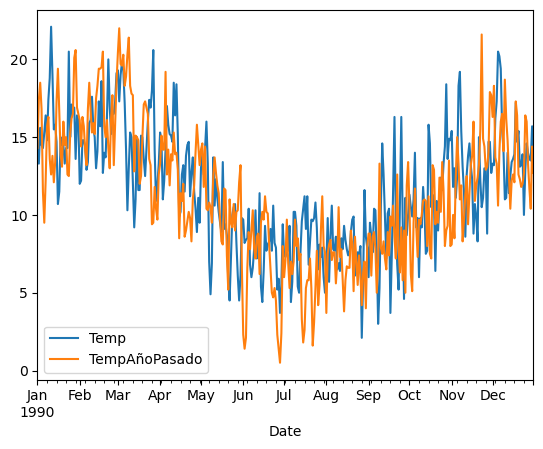

In [56]:
df[['Temp','TempAñoPasado']][-365:].plot()

In [57]:
error_rmse(df,'Temp','TempAñoPasado')

3.650760851455563

In [58]:
error_l1(df,'Temp','TempAñoPasado')

2.8673972602739726

## Moving average.

En esta misma linea de pensar "baselines" de qué hacer, sigamos con las ideas.

Imaginemos que tenemos una cantidad que va creciendo constantemente poco a poco pero con ruido (e.g. temperatura, economía). Si tomamos el promedio de TODO lo anterior, pues claro que no va a funcionar bien, porque el promedio siempre será más chico que el real. Las temperaturas más recientes son más indicativas de qué está pasando, pero si siempre adivinamos la última, tendríamos mucho ruido.

Lo que vamos a hacer, inicialmente, es no tomar nada más el último, sino el promedio de los últimos $k$ (con $k=5$ o algún número chiquito).

Inténtalo para $k \in \{2,3,4,5,6,7,8,20\}$

In [ ]:
alumnos

In [ ]:
random.choice(alumnos)

In [59]:
df['PromUltimas5'] = df['Temp'].rolling(window = 5).mean().shift(1)

<Axes: xlabel='Date'>

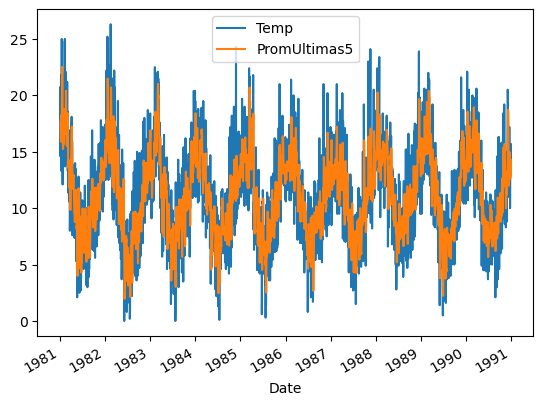

In [60]:
df[['Temp', 'PromUltimas5']].plot()

In [61]:
error_rmse(df, 'Temp', 'PromUltimas5')

2.661988750838185

In [62]:
error_l1(df, 'Temp', 'PromUltimas5')

2.0526575342465754

In [63]:
# {2,3,4,5,6,7,8,20}
for k in {1,2,3,4,5,6,7,8,20}:
    df[f'PromedioUltimas{k}'] = df['Temp'].rolling(window = k).mean().shift(1)
    print(f'Para k = {k} el rmse es {error_rmse(df, "Temp", f"PromedioUltimas{k}")}')

Para k = 1 el rmse es 2.5824009217292243
Para k = 2 el rmse es 2.7128196421728634
Para k = 3 el rmse es 2.7478022212641453
Para k = 4 el rmse es 2.7029828779250833
Para k = 5 el rmse es 2.661988750838185
Para k = 6 el rmse es 2.643803818390651
Para k = 7 el rmse es 2.6331728210270557
Para k = 8 el rmse es 2.6307927766286805
Para k = 20 el rmse es 2.6683732795289545


<Axes: xlabel='Date'>

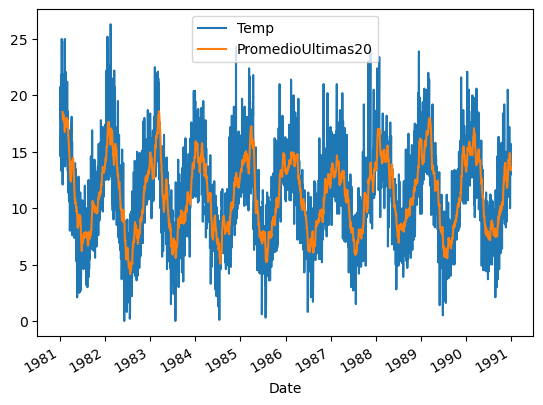

In [64]:
df[['Temp', 'PromedioUltimas20']].plot()

In [65]:
0.9**2

0.81

## Exponentially weighted moving average

Algo que muchas veces expresa el promedio bien es calcular el "exponentially weighted moving average": 
Si $x_0,x_1,x_2,...$ son los valores reales, y $y_0,y_1,y_2$ son nuestras predicciones (o sea, $y_i$ puede depender de $x_0,x_1,...,x_{i-1}$).


$$y_1 = x_0$$
$$y_n = \alpha x_{n-1} + (1-\alpha) y_{n-1}$$



Es decir, para calcular el siguiente término, llevamos "la cuenta" y el siguiente término lo calculamos como $\alpha\ \times$ el nuevo término + $(1-\alpha)\ \times$ lo que ya llevábamos.

Entonces ejercicio: calcúlenlo uds. No tiene que ser eficiente ni nada, solo háganlo.

In [66]:
L = [random.randint(1,100) for _ in range(18)]

In [67]:
random.choice(alumnos)

'Tania'

In [68]:
def ewma(X,α=0.2):
    y = X[0]
    Y = [y]
    for x in X[1:]:
        y = α*x + (1-α)*y
        Y += [y]
    return Y

In [69]:
0.99**1000

4.317124741065786e-05

In [70]:
L

[86, 64, 44, 93, 7, 24, 59, 97, 88, 81, 24, 49, 59, 82, 68, 38, 44, 56]

In [71]:
ewma(L)

[86,
 81.6,
 74.08,
 77.864,
 63.6912,
 55.75296,
 56.40236800000001,
 64.52189440000001,
 69.21751552,
 71.574012416,
 62.0592099328,
 59.44736794624001,
 59.357894356992006,
 63.88631548559361,
 64.7090523884749,
 59.367241910779924,
 56.29379352862394,
 56.23503482289915]

In [72]:
len(df)

3650

In [73]:
len(ewma(df["Temp"]))

/tmp/ipykernel_249998/4050442010.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = X[0]


3650

In [74]:
df["EWMA"] = ewma(df["Temp"],0.5)

/tmp/ipykernel_249998/4050442010.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = X[0]


In [75]:
df["EWMA"] = df['EWMA'].shift(1)

<Axes: xlabel='Date'>

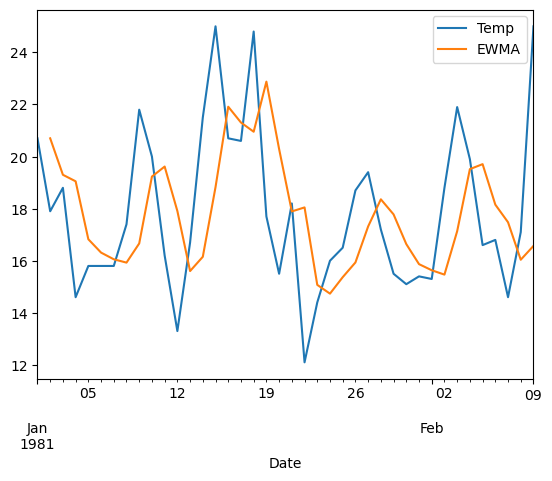

In [76]:
df[['Temp', 'EWMA']][:40].plot()

In [77]:
import numpy as np

In [78]:
3650-365

3285

In [79]:
for α in np.arange(0.01,1.001,0.03):
    df['EWMA'] = ewma(df['Temp'],α=α)
    df['EWMA'] = df['EWMA'].shift(1)
    print(f"Para α = {α:.3f}, rmse = {error_rmse(df,'Temp','EWMA')}")

Para α = 0.010, rmse = 3.6162313030830915
Para α = 0.040, rmse = 2.7747926717880325
Para α = 0.070, rmse = 2.606233159640347
Para α = 0.100, rmse = 2.5537356332830377
Para α = 0.130, rmse = 2.5294388964972527
Para α = 0.160, rmse = 2.5153197940163956
Para α = 0.190, rmse = 2.5061463784574762
Para α = 0.220, rmse = 2.4999004205057402
Para α = 0.250, rmse = 2.4955986580356653
Para α = 0.280, rmse = 2.49267989775642
Para α = 0.310, rmse = 2.490792908901627
Para α = 0.340, rmse = 2.489706182862716
Para α = 0.370, rmse = 2.489262426034726
Para α = 0.400, rmse = 2.489352872662964
Para α = 0.430, rmse = 2.4899018287595256
Para α = 0.460, rmse = 2.4908570562237857
Para α = 0.490, rmse = 2.492183681202166
Para α = 0.520, rmse = 2.4938602839716197
Para α = 0.550, rmse = 2.495876351062568
Para α = 0.580, rmse = 2.4982305809042695
Para α = 0.610, rmse = 2.5009297292494237
Para α = 0.640, rmse = 2.5039878053686357
Para α = 0.670, rmse = 2.507425508896698
Para α = 0.700, rmse = 2.511269845416538
Par

/tmp/ipykernel_249998/4050442010.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = X[0]


Hay un problema en realidad: le estamos dando demasiado peso al inicial. Entonces mejor queremos algo así. Por ejemplo, si los términos de la sucesión son $x_0,x_1,...,x_n$ y nosotros adivinamos $y_0,y_1,\dots,y_n$, podríamos calcular así:
    $$y_n = \frac{\alpha x_{n-1} + \alpha^2 x_{n-2} + \dots + \alpha^n x_0}{\alpha+\alpha^2+\dots+\alpha^n}$$
    
Es decir, estamos haciendo un promedio en donde a cada uno le damos un peso más y más chico que decae exponencialmente.

Primero que nada, manipulemos esa para poderla ir calculando de término en término. ¿Cómo depende $y_n$ del anterior?

In [81]:
alumnos = ["ARndold", "Miguel", "Ana Paola", "ERika", "Hannia", "Diego", "Gerardo"]

In [82]:
random.choice(alumnos)

'ERika'

In [83]:
def ewma_lento(X,α=0.2):
    num = 0
    den = 0
    for i, x in enumerate(X):
        den += α**i
        num += x * α**(len(X)-1-i)
    return num/den
        

In [84]:
def ewma(X, α=0.2):
    Y = []
    num, den = 0, 0
    for x in X:
        den = den*α + 1
        num = num*α + x
        Y.append(num/den)
    return Y

In [85]:
for α in np.arange(0.01,0.9,0.03):
    df['EWMA'] = ewma(df['Temp'],α=α)
    df['EWMA'] = df['EWMA'].shift(1)
    print(f"Para α = {α:.3f}, rmse = {error_rmse(df,'Temp','EWMA')}")

Para α = 0.010, rmse = 2.578693082105693
Para α = 0.040, rmse = 2.5682850410483447
Para α = 0.070, rmse = 2.5588719935497366
Para α = 0.100, rmse = 2.5503612852611055
Para α = 0.130, rmse = 2.5426689998952177
Para α = 0.160, rmse = 2.535719209941995
Para α = 0.190, rmse = 2.5294433592539587
Para α = 0.220, rmse = 2.5237797638487063
Para α = 0.250, rmse = 2.5186732221334815
Para α = 0.280, rmse = 2.5140747300278323
Para α = 0.310, rmse = 2.50994130005726
Para α = 0.340, rmse = 2.506235886442181
Para α = 0.370, rmse = 2.502927420818159
Para α = 0.400, rmse = 2.499990966300439
Para α = 0.430, rmse = 2.497408002735914
Para α = 0.460, rmse = 2.4951668658690314
Para α = 0.490, rmse = 2.4932633819550247
Para α = 0.520, rmse = 2.491701773108931
Para α = 0.550, rmse = 2.490495965770615
Para α = 0.580, rmse = 2.4896715268330136
Para α = 0.610, rmse = 2.4892685967312134
Para α = 0.640, rmse = 2.489346415626355
Para α = 0.670, rmse = 2.4899904053548183
Para α = 0.700, rmse = 2.4913234051617077
Par

Baselines!

## EWMA en pandas

En pandas ya está EWMA:

In [86]:
df['EWMA'] = df['Temp'].ewm(alpha=0.37).mean().shift(1)

In [ ]:
df['EWMA'][:10]

In [ ]:
ewma(df['Temp'],0.37)

In [ ]:
error_rmse(df,'Temp','EWMA')

In [ ]:
df[['Temp','EWMA']]

In [ ]:
df[['Temp','EWMA']].plot(figsize=(20,6))

Hay varias maneras de entender los parámetros de ewm, pero lo que hace es calcular alpha. Por ejemplo, podemos definir la vida media. Lo mejor es jugarle.

In [ ]:
L = np.linspace(0,10) + np.random.randn(50)*0.09

In [ ]:
plt.plot(L[1:])
plt.plot(ewma(L))

In [ ]:
df['Tonta'] = np.linspace(0,10,num=3650)*np.linspace(0,10,num=3650)

In [ ]:
df['Tonta_EWMA'] = df['Tonta'].ewm(0.1).mean().shift(1)

In [ ]:
df[['Tonta','Tonta_EWMA']][:10].plot()

### Método de Holt
¿Cuál es el problema de EWMA? Imaginemos que los valores fueran creciendo constantemente. Sería razonable pensar que seguirá creciendo. EWMA siempre predice valores más pequeños que el último, porque es simplemente un promedio pesado. Vamos entonces a usar una componente de "tendencia" $b_t$, en donde simplemente mediremos qué tanto van creciendo o disminuyendo los valores (método de Holt)

En EWMA teníamos:
$$y_0 = x_0$$
$$y_n = \alpha x_{n} + (1-\alpha) y_{n-1}$$

Para tomar en cuenta la tendencia, debemos medir cómo va cambiando el nivel en cada medición y tomaremos el promedio de éstos:

$$\ell_t = (1-\alpha)\ell_{t-1} + \alpha x_t$$
$$b_t = (1-\beta)b_{t-1} + \beta(\ell_t-\ell_{t-1})$$
$$y_t = \ell_t + b_t$$

Prográmalo aquí:

In [88]:
random.choice(alumnos)

'Gerardo'

In [89]:
def holt(X, α=0.5, β=0.5):
    L = ewma(X, α)
    D = [b-a for a,b in zip(L,L[1:])]
    B = [0]+ewma(D, β)
    return [l+b for l,b in zip(L,B)]

In [100]:
df['Holt'] = holt(df['Temp'], α=0.65, β=0.3)
df['Holt'] = df['Holt'].shift(1)

In [106]:
best = 8
for α in np.linspace(0.4,0.8,num=50):
    for β in np.linspace(0.05,0.4,num=50):
        df['Holt'] = holt(df['Temp'], α=α, β=β)
        df['Holt'] = df['Holt'].shift(1)
        e = error_rmse(df,'Temp','Holt')
        if e < best:
            print(f"Para α = {α} y  β = {β}, error_rmse = {error_rmse(df,'Temp','Holt')}")
            best = e

Para α = 0.4 y  β = 0.05, error_rmse = 2.75303871830682
Para α = 0.4 y  β = 0.05714285714285715, error_rmse = 2.7519218046718983
Para α = 0.4 y  β = 0.0642857142857143, error_rmse = 2.750832266864616
Para α = 0.4 y  β = 0.07142857142857142, error_rmse = 2.7497688918157945
Para α = 0.4 y  β = 0.07857142857142857, error_rmse = 2.7487304850054195
Para α = 0.4 y  β = 0.08571428571428572, error_rmse = 2.7477158699144133
Para α = 0.4 y  β = 0.09285714285714286, error_rmse = 2.746723887495736
Para α = 0.4 y  β = 0.1, error_rmse = 2.7457533956639293
Para α = 0.4 y  β = 0.10714285714285715, error_rmse = 2.744803268802266
Para α = 0.4 y  β = 0.1142857142857143, error_rmse = 2.7438723972867116
Para α = 0.4 y  β = 0.12142857142857144, error_rmse = 2.7429596870259294
Para α = 0.4 y  β = 0.1285714285714286, error_rmse = 2.742064059016611
Para α = 0.4 y  β = 0.13571428571428573, error_rmse = 2.741184448913439
Para α = 0.4 y  β = 0.14285714285714285, error_rmse = 2.740319806613028
Para α = 0.4 y  β = 

In [ ]:
def holt(X,α=0.5,β=0.5):
    L = ewma(X,α)
    D = [b-a for a,b in zip(L,L[1:])]
    B = [0] + ewma(D,β)
    #print(B)
    return [l+b for l,b in zip(L,B)]

In [ ]:
df["holt"] = holt(df['Temp'])
df["holt"] = df["holt"].shift(1)

In [ ]:
df['Tonta'] = np.linspace(0,10,num=3650)#*np.linspace(0,10,num=3650)

In [ ]:
df['Tonta_EWMA'] = df['Tonta'].ewm(0.5).mean().shift(1)

In [ ]:
df['Tonta_Holt'] = holt(df['Tonta'],0.5,0.3)#.ewm(0.1).mean().shift(1)
#df['Tonta_Holt'] = df['Tonta_Holt'].shift(1)

In [ ]:
df[['Tonta','Tonta_Holt','Tonta_EWMA']][30:50].plot()

Ejercicios: 
1. Juega con los parámetros α,β.
2. Pregunta: Si quisiéramos predecir qué pasa en 10 (o 20) tiempos... ¿qué predecimos?

$$ y_{t+k} \approx y_t + k\cdot b_t $$ 

## Método de Holt-Winters

Posteriormente le agregaremos una componente de "periodicidad" $s_t$ (seasonality), en donde tomaremos en cuenta los valores del periodo anterior para modelar los ciclos que vemos.

En resumen, usamos 3 componentes: 
1. $\ell_t$ para el "nivel" (EWMA básicamente)
2. $b_t$ para la tendencia
3. $s_t$ para la periodicidad

Cada uno tendrá su parámetro de suavizado: $\alpha, \beta, \gamma$.

In [ ]:
error_rmse??

In [ ]:
error_rmse(df,'Temp','holt')

## Método de Holt-Winters: 

Ahora, de la misma manera, podemos entender cómo tomar en cuenta la seasonality. Digamos que creemos que el ciclo debe tener periodo $L$ (e.g. 365). Vamos a considerar un factor $s_t$ multiplicativo (e.g. $y_t = (\ell_t + b_t)s_t$) que irá cambiando con el periodo.

$$\ell_t = (1-\alpha)\ell_t + \alpha x_t$$
$$b_t = (1-\beta)b_{t-1} + \beta(\ell_t-\ell_{t-1})$$
$$s_t = (1-\gamma)s_{t-L} + \gamma((\ell_t+b_t)/(\ell_{t-1}+b_{t-1})) $$
$$y_t = (\ell_t + b_t)s_t$$

In [124]:
def holtWinters(X,α=0.72, β=0.1, γ=0.30, P=365):
    L = ewma(X,α)
    D = [b-a for a,b in zip(L,L[1:])]
    B = [0] + ewma(D,β)
    S = [1]*P
    for t in range(P,len(X)):
        d = (L[t] + B[t]) - (L[t-1] + B[t-1])
        s = S[t-P] * (1- γ) + γ * d
        S.append(s)
    return [(l + b) + s for l, b, s in zip(L, B, S)]
    

In [125]:
df['TempHoltWinters'] = holtWinters(df['Temp'])
df['TempHoltWinters'] = df['TempHoltWinters'].shift(1)

In [126]:
error_rmse(df,'TempHoltWinters','Temp')

2.355931718341859

<Axes: xlabel='Date'>

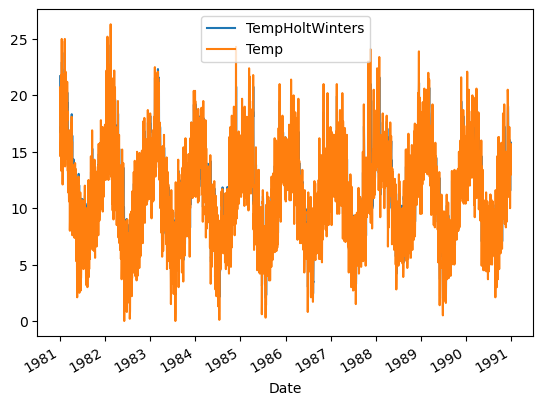

In [114]:
df[['TempHoltWinters','Temp']].plot()

## Seasonality, Trend

En realidad muchos datos tienen una componente de "seasonality", o periodicidad y también una "trend" o "tendencia". Hay miles de maneras de separar en estas dos componentes. Veremos algunas.

### Filtro de Hodrick-Prescott.
La idea es separar la señal en dos componentes así:
    $$y_t = \tau_t + c_t$$
donde $\tau$ denota la tendencia y $c$ la componente cíclica. Los encontramos minimizando lo siguiente:
    $$min_{\tau_t} \sum c_t^2 + \lambda \sum \left[ (\tau_t - \tau_{t-1}) - (\tau_{t-1} -\tau_{t-2}) \right]$$
donde $\lambda$ es un parámetro de suavizado que se puede escoger. Usualmente se pone dependiendo del periodo de repetición (luego veremos otros métodos que lo escogen automáticamente). Por ejemplo, $\lambda = 6.25$ para datos anuales (como el que tenemos).

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels as sm
from statsmodels.tsa.filters.hp_filter import hpfilter

In [ ]:
hpfilter??

In [ ]:
temp_trend, temp_cycle  = hpfilter(df['Temp'],lamb=16000.25)

In [ ]:
df['temp_cycle'] = temp_cycle
df['temp_trend'] = temp_trend

In [ ]:
df[['temp_cycle','temp_trend']].plot()

In [ ]:
df[['Temp','temp_cycle']].plot()

Vamos a repetir este análisis pero con con el archivo "macrodata.csv", obtenido de https://www.statsmodels.org/stable/datasets/generated/macrodata.html

que contiene datos macroeconómicos de estados unidos.

In [ ]:
d = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [ ]:
d

In [ ]:
d['realgdp'].plot()

In [ ]:
realgdp_cycle, realgdp_trend  = hpfilter(d['realgdp'],lamb=6.25)

In [ ]:
d['realgdp_cycle'] = realgdp_cycle
d['realgdp_trend'] = realgdp_trend

In [ ]:
d[['realgdp_cycle','realgdp_trend']].plot()

## Modelos ETS: Error, Trend, Seasonality

Los modelos ETS son una familia de modelos para series de tiempo que separa las señales en Error (E), Tendencia (T) y Estacional (S... por seasonal).



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(df['Temp'],period=365)

In [ ]:
import pylab

In [ ]:
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
result.plot();

In [ ]:
alpha = 0.5*
y_5 = 0.5*x_4 + 0.25*x_3 + 0.125*x_2 + 0.0625*x_1 + 0.03125*x_0